In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Setel gaya "ggplot"
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(r"C:\Users\daffa\OneDrive\Documents\Kuliah\Semester 7\ML\EconomiesOfScale.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [4]:
df.head(10)

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013
5,1.307435,100.000000
6,1.339386,94.759756
7,1.379044,67.185383
8,1.420000,72.886041
9,1.473948,61.967696


In [5]:
df.tail(10)

,Number of Units,Manufacturing Cost
990,7.900366,27.595130
991,7.927897,24.700869
992,7.974248,24.000024
993,7.998722,22.349817
994,8.087334,26.569888
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311
999,10.000000,21.547777


In [6]:
df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


Mean Squared Error (MSE): 34.41
Mean Absolute Error (MAE): 4.44


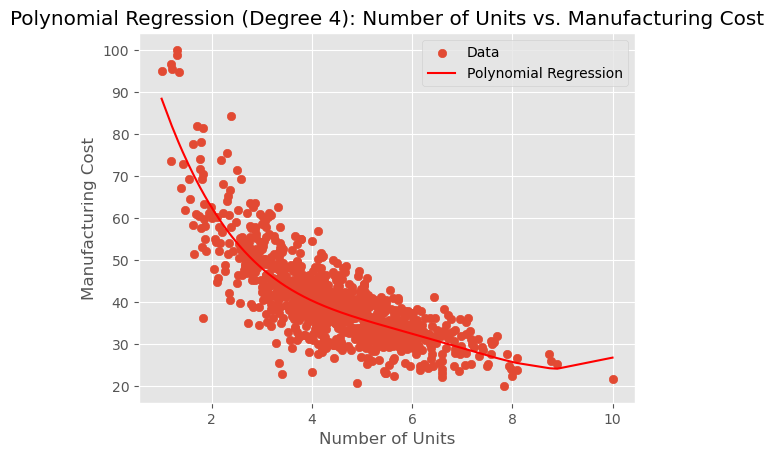

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Extracting data from the DataFrame
X = df[['Number of Units']].values
y = df['Manufacturing Cost'].values

# Define the degree of the polynomial
degree = 4

# Transform the features to polynomial features
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict the manufacturing cost using the model
y_pred = model.predict(X_poly)

# Calculate MSE and MAE
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

# Plot the results
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Polynomial Regression')
plt.xlabel('Number of Units')
plt.ylabel('Manufacturing Cost')
plt.title(f'Polynomial Regression (Degree {degree}): Number of Units vs. Manufacturing Cost')
plt.legend()

# Print MSE and MAE
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')

plt.show()

Degree 2:
Mean Squared Error (MSE): 37.57
Mean Absolute Error (MAE): 4.54
------------------------------
Degree 3:
Mean Squared Error (MSE): 35.07
Mean Absolute Error (MAE): 4.47
------------------------------
Degree 4:
Mean Squared Error (MSE): 34.41
Mean Absolute Error (MAE): 4.44
------------------------------
Degree 5:
Mean Squared Error (MSE): 34.08
Mean Absolute Error (MAE): 4.41
------------------------------
Degree 6:
Mean Squared Error (MSE): 33.89
Mean Absolute Error (MAE): 4.40
------------------------------


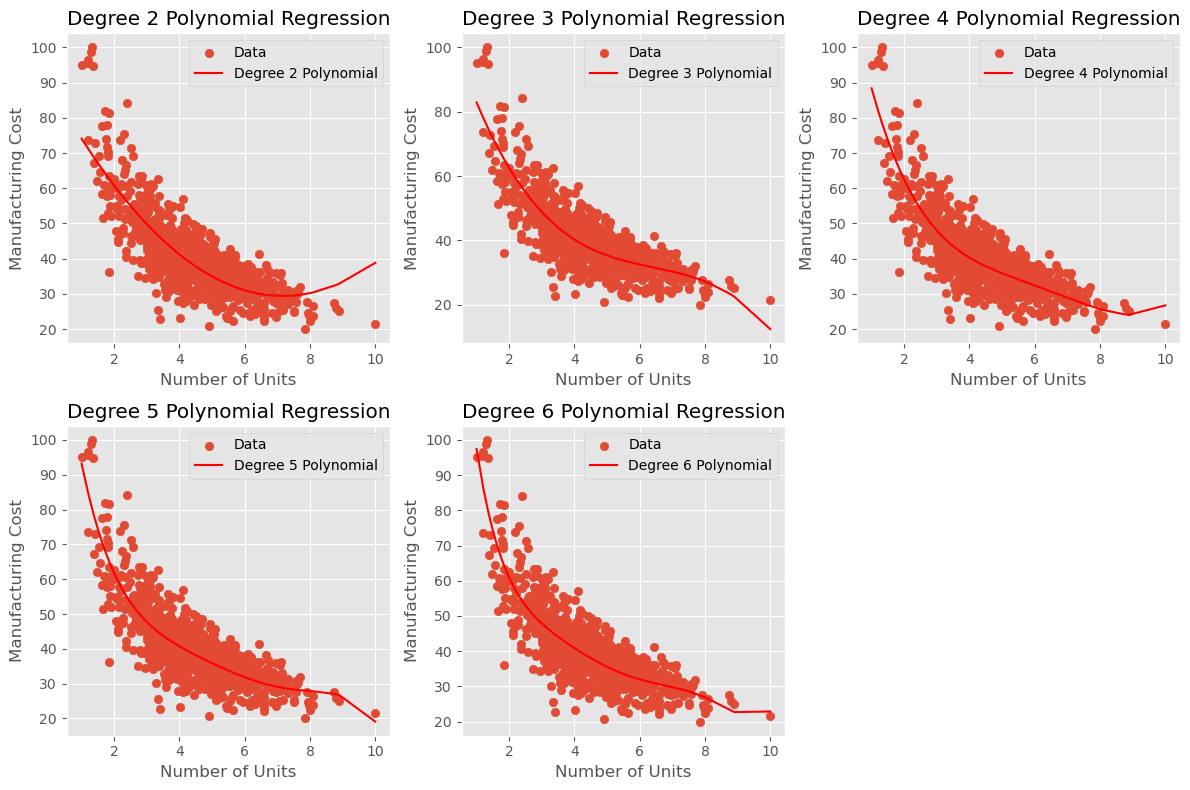

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Data
X = df[['Number of Units']].values
y = df['Manufacturing Cost'].values

# Derajat polinomial yang akan diuji
degrees = [2, 3, 4, 5, 6]

plt.figure(figsize=(12, 8))

for degree in degrees:
    # Transformasi fitur menjadi fitur polinomial
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Model regresi linear
    model = LinearRegression()
    model.fit(X_poly, y)

    # Prediksi biaya manufaktur
    y_pred = model.predict(X_poly)

    # Menghitung MSE dan MAE
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)

    # Plot hasilnya
    plt.subplot(2, 3, degree - 1)
    plt.scatter(X, y, label='Data')
    plt.plot(X, y_pred, color='red', label=f'Degree {degree} Polynomial')
    plt.xlabel('Number of Units')
    plt.ylabel('Manufacturing Cost')
    plt.title(f'Degree {degree} Polynomial Regression')
    plt.legend()
    plt.grid(True)

    # Print MSE dan MAE
    print(f'Degree {degree}:')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print('-' * 30)

plt.tight_layout()
plt.show()